# More Examples on Eigen Decomposition

The Gram-Schmidt process is a method for orthonormalizing a set of vectors. Here's an example of implementing the Gram-Schmidt process using NumPy in Python:

In [11]:
import numpy as np
# Example usage
vectors = np.array([[1, 2, 1], [2, -1, 3], [3, 1, 2]], dtype=float)
np.dot(vectors[:,1],vectors[:,2])
np.linalg.matrix_rank(vectors)

3

In [12]:
import numpy as np

def gram_schmidt(matrix):
    num_vectors, vector_size = matrix.shape
    ortho_matrix = np.zeros((num_vectors, vector_size))
    
    for i in range(num_vectors):
        # Orthogonalization
        ortho_matrix[i] = matrix[i]
        for j in range(i):
            ortho_matrix[i] -= np.dot(matrix[i], ortho_matrix[j]) / np.dot(ortho_matrix[j], ortho_matrix[j]) * ortho_matrix[j]

        # Normalization
        ortho_matrix[i] /= np.linalg.norm(ortho_matrix[i])

    return ortho_matrix



# Apply Gram-Schmidt process
orthonormalized_vectors = gram_schmidt(vectors)


# Print the result
print("Original Vectors:")
print(vectors)
print("\nOrthonormalized Vectors:")
print(orthonormalized_vectors)


Original Vectors:
[[ 1.  2.  1.]
 [ 2. -1.  3.]
 [ 3.  1.  2.]]

Orthonormalized Vectors:
[[ 0.40824829  0.81649658  0.40824829]
 [ 0.42426407 -0.56568542  0.70710678]
 [ 0.80829038 -0.11547005 -0.57735027]]


In [13]:
# Check if columns are orthonormal
is_orthonormal = np.allclose(np.dot(orthonormalized_vectors.T, orthonormalized_vectors), np.eye(vectors.shape[1]))
print("\nColumns are orthonormal:", is_orthonormal)



Columns are orthonormal: True


In [19]:
np.linalg.norm(orthonormalized_vectors[:,2])

1.0

In [20]:
# Define four linearly independent vectors
vector1 = np.array([1, 2, 0, 0])
vector2 = np.array([0, 1, 3, 0])
vector3 = np.array([0, 0, 1, 4])
vector4 = np.array([2, 1, 0, 1])

# Verify linear independence
original_vectors = np.vstack([vector1, vector2, vector3, vector4])
rank = np.linalg.matrix_rank(original_vectors)

In [21]:
print("Linearly Independent Vectors:")
print("Vector 1:", vector1)
print("Vector 2:", vector2)
print("Vector 3:", vector3)
print("Vector 4:", vector4)
print("\nRank of the Vectors Matrix:", rank)

Linearly Independent Vectors:
Vector 1: [1 2 0 0]
Vector 2: [0 1 3 0]
Vector 3: [0 0 1 4]
Vector 4: [2 1 0 1]

Rank of the Vectors Matrix: 4


In [25]:
# Step 1: Normalize the vectors using Gram-Schmidt
orthonormalized_vectors = gram_schmidt(original_vectors)
orthonormalized_vectors

array([[ 0.4472136 ,  0.89442719,  0.        ,  0.        ],
       [-0.13187609,  0.06593805,  0.98907071,  0.        ],
       [ 0.03258657, -0.01629328,  0.00543109,  0.99932134],
       [ 0.88405136, -0.44202568,  0.14734189, -0.03683547]])

In [28]:
original_vectors

array([[1, 2, 0, 0],
       [0, 1, 3, 0],
       [0, 0, 1, 4],
       [2, 1, 0, 1]])

In [27]:
# Step 2: Create rank-one matrices from the orthogonal vectors
eigenvalues = np.array([2.0, 1.5, 1.0, 0.5])
rank_one_matrices = [eig * np.outer(v, v) for eig, v in zip(eigenvalues, orthonormalized_vectors)]

print("\nRank-One Matrices:")
for i, rank_one_matrix in enumerate(rank_one_matrices):
    print(f"Matrix {i + 1}:\n{rank_one_matrix}\n")


Rank-One Matrices:
Matrix 1:
[[0.4 0.8 0.  0. ]
 [0.8 1.6 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]

Matrix 2:
[[ 0.02608696 -0.01304348 -0.19565217 -0.        ]
 [-0.01304348  0.00652174  0.09782609  0.        ]
 [-0.19565217  0.09782609  1.4673913   0.        ]
 [-0.          0.          0.          0.        ]]

Matrix 3:
[[ 1.06188425e-03 -5.30942127e-04  1.76980709e-04  3.25644505e-02]
 [-5.30942127e-04  2.65471064e-04 -8.84903546e-05 -1.62822252e-02]
 [ 1.76980709e-04 -8.84903546e-05  2.94967849e-05  5.42740841e-03]
 [ 3.25644505e-02 -1.62822252e-02  5.42740841e-03  9.98643148e-01]]

Matrix 4:
[[ 0.39077341 -0.1953867   0.0651289  -0.01628223]
 [-0.1953867   0.09769335 -0.03256445  0.00814111]
 [ 0.0651289  -0.03256445  0.01085482 -0.0027137 ]
 [-0.01628223  0.00814111 -0.0027137   0.00067843]]



In [30]:
# Step 3: Sum all rank-one matrices to create a new matrix

sum_matrix = np.sum(rank_one_matrices, axis=0)
print("Sum Matrix:")
print(np.round(sum_matrix,4))

Sum Matrix:
[[ 0.8179  0.591  -0.1303  0.0163]
 [ 0.591   1.7045  0.0652 -0.0081]
 [-0.1303  0.0652  1.4783  0.0027]
 [ 0.0163 -0.0081  0.0027  0.9993]]


In [31]:
# Step 4: Investigate the eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(sum_matrix)

print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[0.5 2.  1.5 1. ]

Eigenvectors:
[[-8.84051362e-01  4.47213595e-01  1.31876095e-01  3.25865656e-02]
 [ 4.42025681e-01  8.94427191e-01 -6.59380473e-02 -1.62932828e-02]
 [-1.47341894e-01  1.39479371e-16 -9.89070710e-01  5.43109426e-03]
 [ 3.68354734e-02  1.45680745e-17  7.56716803e-17  9.99321344e-01]]


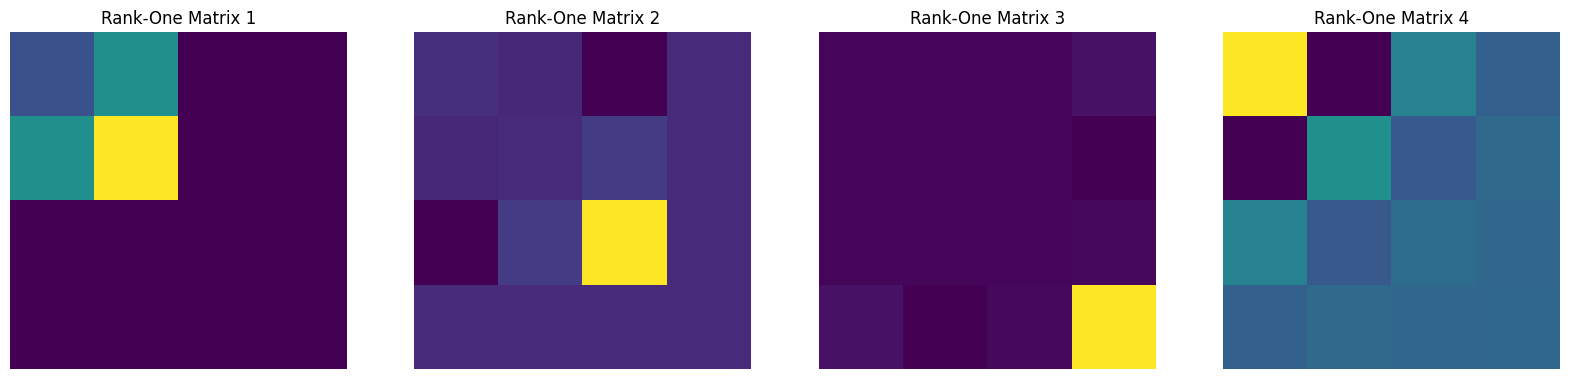

In [42]:
import matplotlib.pyplot as plt

# Set up a 1x4 subplot grid
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot each rank-one matrix in a separate subplot
for i, (ax, rank_one_matrix) in enumerate(zip(axes, rank_one_matrices)):
    ax.imshow(rank_one_matrix)
    ax.set_title(f"Rank-One Matrix {i + 1}")
    ax.axis('off')  # Turn off axis labels and ticks

plt.show()


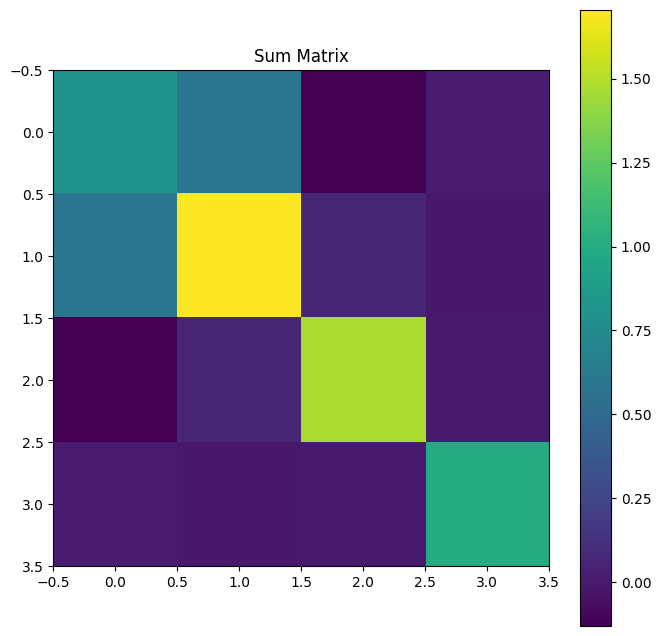

In [43]:
import matplotlib.pyplot as plt

# Plot the sum matrix
plt.figure(figsize=(8, 8))
plt.imshow(sum_matrix)
plt.title("Sum Matrix")
plt.colorbar()
plt.show()

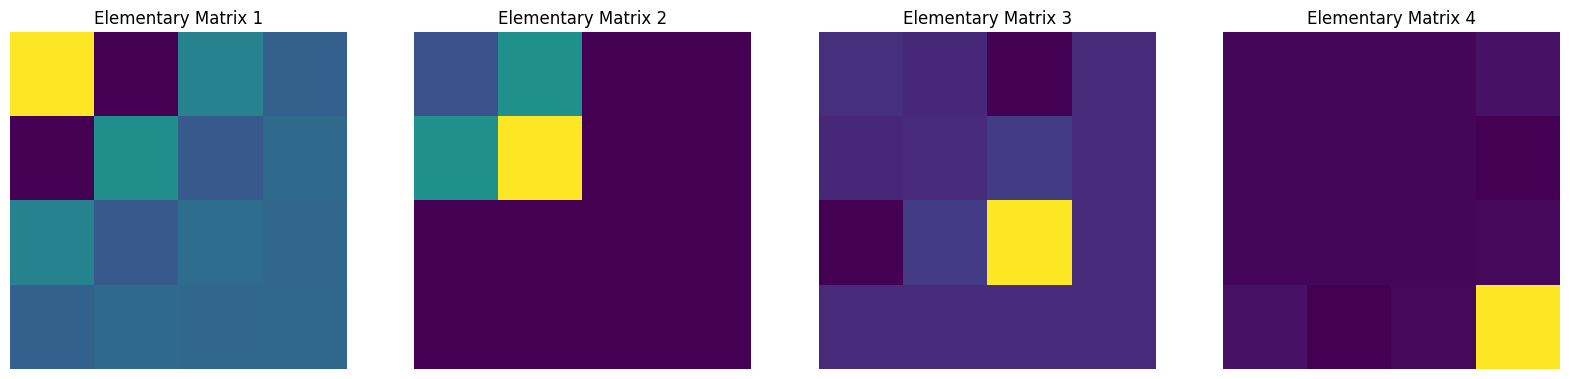

In [45]:
# Use the eigenvectors of the sum matrix to build elementary matrices
elementary_matrices = [np.outer(v, v.T) for v in eigenvectors.T]

# Plot each elementary matrix
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, (ax, elementary_matrix) in enumerate(zip(axes, elementary_matrices)):
    ax.imshow(elementary_matrix, cmap='viridis', interpolation='nearest')
    ax.set_title(f"Elementary Matrix {i + 1}")
    ax.axis('off')  # Turn off axis labels and ticks

plt.show()


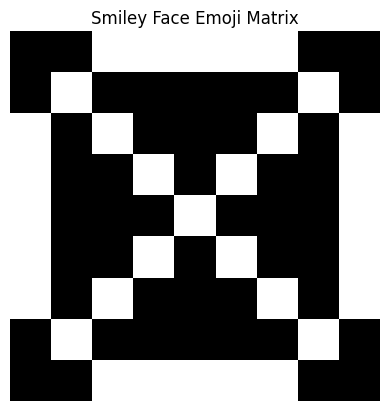

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple smiley face emoji matrix
emoji_matrix = np.array([
    [0, 0, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 1, 0],
    [1, 0, 1, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 1, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 1, 1, 1, 1, 0, 0]
])

# Plot the smiley face emoji matrix
plt.imshow(emoji_matrix, cmap='gray', interpolation='nearest')
plt.title("Smiley Face Emoji Matrix")
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


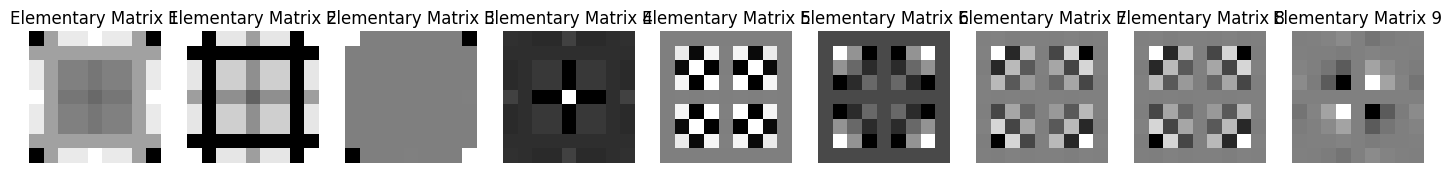

In [51]:
# Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(emoji_matrix)

# Use the eigenvectors to build elementary matrices
elementary_matrices = [np.real(eig) * np.outer(np.real(v), np.real(v.T)) for eig, v in zip(eigenvalues, eigenvectors.T)]

# Plot each elementary matrix
fig, axes = plt.subplots(1, 9, figsize=(18, 2))

for i, (ax, elementary_matrix) in enumerate(zip(axes, elementary_matrices)):
    ax.imshow(elementary_matrix, cmap='gray', interpolation='nearest')
    ax.set_title(f"Elementary Matrix {i + 1}")
    ax.axis('off')  # Turn off axis labels and ticks

plt.show()

